In [90]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
df=pd.read_csv("Pitchfork2.csv",encoding = "ISO-8859-1")

In [92]:
df=df.drop('Unnamed: 0',axis=1)

In [93]:
genres=["RockFolk/Country","RockMetalExperimental",
"GlobalPop/R&B",
"Pop/R&BFolk/Country",
"ExperimentalElectronic",
"RapElectronic",
"RockRap",
"JazzExperimental",
 "JazzElectronic",
"RockPop/R&B",
"Global",
  "RapPop/R&B",
"RockExperimentalElectronic",
     "Jazz",
 "Pop/R&BElectronic",
  "Metal",
 "RockMetal",
"Experimental",
"Folk/Country",
 "Pop/R&B",
 "RockExperimental",
  "Rap",
"RockElectronic",
 "Electronic","Rock"]

In [94]:
genremeans=df.groupby("genre").mean().reset_index()

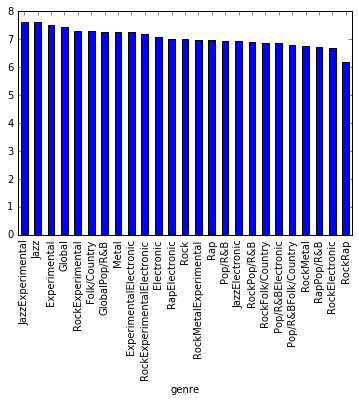

In [110]:
genremeans.ix[genremeans['genre'].isin(genres)].sort_values('scores',ascending=False).plot(x="genre",y="scores",kind="bar",legend=False)

In [107]:
month_scraped=12
day_scraped=23
df['Release Year']=df['years'].str.split("/",expand=True)[0]
df['day']=df['dates'].str.split(" ",expand=True)[1]
df.loc[df['day']=="hrs",'day']=day_scraped
df.loc[df['Release Year'].isnull(),'Release Year']=df.loc[df['Release Year'].isnull(),'dates'].str.split(" ",expand=True)[2]
def get_month(name,number):
    df.loc[df['dates'].str.split(" ",expand=True)[0]==name,'month']=number
months=["January","February","March","April","May","June","July","August","September","October","November","December"]
for i in range(12):
    get_month(months[i],i+1)
df[['dates','month','day','Release Year']]

,dates,month,day,Release Year
0,19 hrs ago,12,23,2016
1,19 hrs ago,12,23,2016
2,19 hrs ago,12,23,2016
3,December 22 2016,12,22,2016
4,December 22 2016,12,22,2016
5,December 22 2016,12,22,1996
6,December 21 2016,12,21,2016
7,December 21 2016,12,21,2016
8,December 20 2016,12,20,2016
9,December 20 2016,12,20,2016


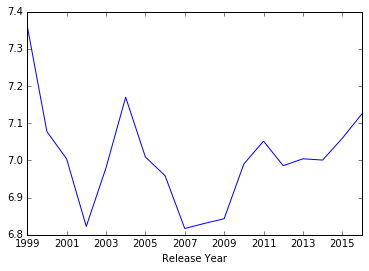

In [10]:
test=df.groupby("Release Year").mean().reset_index()
test.ix[test['Release Year'].astype(float)>1998].plot(x="Release Year",y="scores",legend=False)

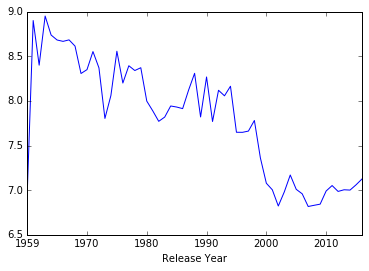

In [11]:
test.plot(x="Release Year",y="scores",legend=False)

<Container object of 18 artists>

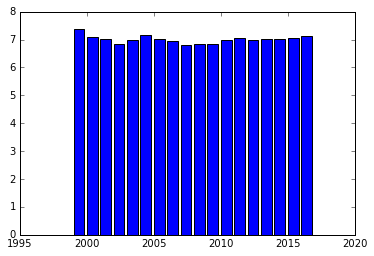

In [12]:
plt.bar(test.ix[test['Release Year'].astype(float)>1998]['Release Year'],test.ix[test['Release Year'].astype(float)>1998]['scores'])

In [15]:
# run to get # of album reviews per year
#df.groupby("Release Year").count().reset_index()

In [20]:
labels75=df.groupby('labels').count()[df.groupby("labels").count()['artists']>75].reset_index()['labels'].tolist()
labels=df.groupby("labels").mean()

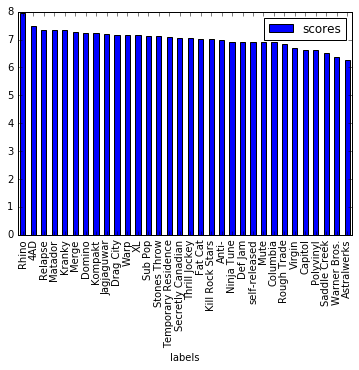

In [29]:
labels.reset_index().ix[labels.reset_index()['labels'].isin(labels75)].sort_values('scores',ascending=False).plot(x="labels",y="scores",kind="bar")

In [36]:
countsmeans=df.groupby("labels").count().reset_index()[['labels','album']].merge(labels.reset_index())

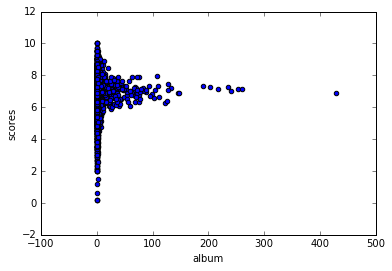

In [41]:
countsmeans.plot.scatter(x="album",y="scores")

In [50]:
artistscores=df.groupby("artists").mean().sort_values("scores",ascending=False).reset_index()
artistcounts=df.groupby("artists").count().reset_index()[['artists','album']]

In [52]:
artists=artistscores.merge(artistcounts)

,artists,scores,album
156,Slowdive,8.625,4


In [57]:
artists.ix[artists['album']==721]

,artists,scores,album
3838,Various Artists,7.290569,721
